### Exploration - NLP

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import acquire
import prepare
from env import get_db_url
from wordcloud import WordCloud

#### Spam Data

In [3]:
query = 'SELECT * FROM spam'
df = pd.read_sql(query, get_db_url('spam_db'))
df.head()

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [5]:
ham = prepare.basic_clean(' '.join(df[df.label == 'ham'].text))
spam = prepare.basic_clean(' '.join(df[df.label == 'spam'].text))
all_words = prepare.basic_clean(' '.join(df.text))

In [7]:
ham[:100]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore w'

In [8]:
spam[:100]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry'

In [9]:
all_words[:100]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore w'

In [49]:
bi_spam = list(nltk.bigrams(spam.split()))
bi_ham = list(nltk.bigrams(ham.split()))
bi_all = list(nltk.bigrams(all_words.split()))
spam_cloud = pd.Series(bi_spam).astype('string').apply(lambda x: re.sub("[()',']", '',x).replace(' ','_'))
ham_cloud = pd.Series(bi_ham).astype('string').apply(lambda x: re.sub("[()',']", '',x).replace(' ','_'))
all_cloud = pd.Series(bi_all).astype('string').apply(lambda x: re.sub("[()',']", '',x).replace(' ','_'))

<AxesSubplot:>

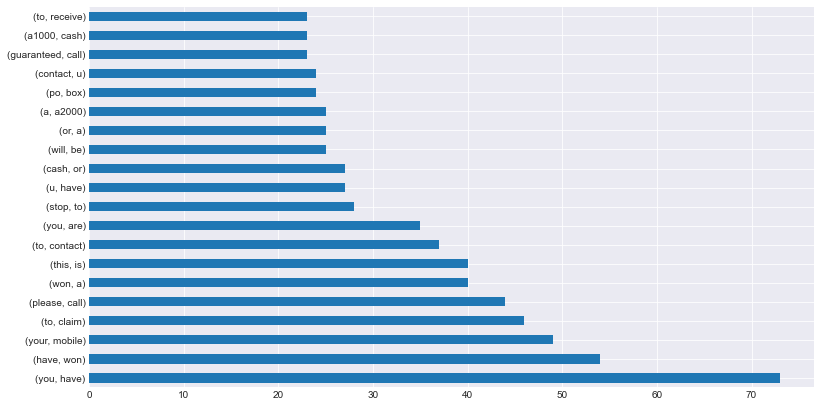

In [30]:
pd.Series(bi_spam).value_counts().head(20).plot.barh()

In [51]:
spam_cloud[:100]

0      free_entry
1        entry_in
2            in_2
3             2_a
4          a_wkly
         ...     
95    entitled_to
96      to_update
97      update_to
98         to_the
99     the_latest
Length: 100, dtype: object

(-0.5, 799.5, 599.5, -0.5)

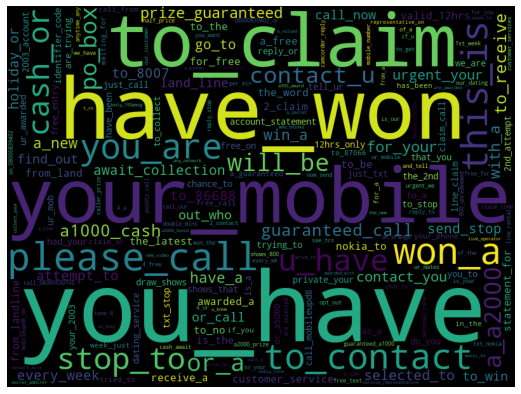

In [53]:
img = WordCloud(background_color='black', width=800, height=600).generate_from_frequencies(spam_cloud.value_counts())
plt.imshow(img)
plt.axis('off')

<AxesSubplot:>

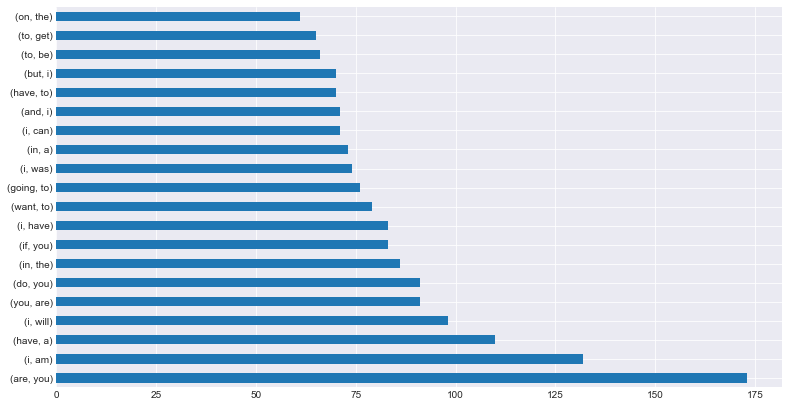

In [32]:
pd.Series(bi_ham).value_counts().head(20).plot.barh()

(-0.5, 799.5, 599.5, -0.5)

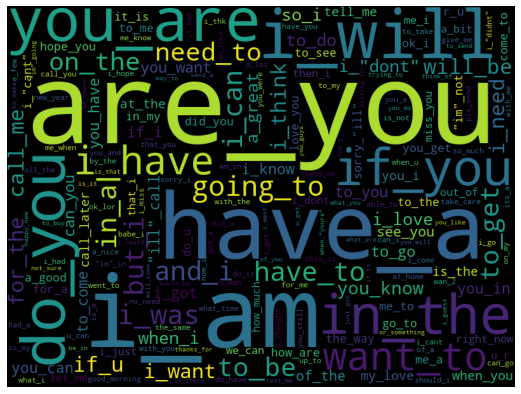

In [54]:
img = WordCloud(background_color='black', width=800, height=600).generate_from_frequencies(ham_cloud.value_counts())
plt.imshow(img)
plt.axis('off')

In [55]:
tri_spam = list(nltk.ngrams(spam.split(), 3))
tri_ham = list(nltk.ngrams(ham.split(), 3))
tri_all = list(nltk.ngrams(all_words.split(), 3))
tri_spam_cloud = pd.Series(tri_spam).astype('string').apply(lambda x: re.sub("[()',']", '',x).replace(' ','_'))
tri_ham_cloud = pd.Series(tri_ham).astype('string').apply(lambda x: re.sub("[()',']", '',x).replace(' ','_'))
tri_all_cloud = pd.Series(tri_all).astype('string').apply(lambda x: re.sub("[()',']", '',x).replace(' ','_'))

<AxesSubplot:>

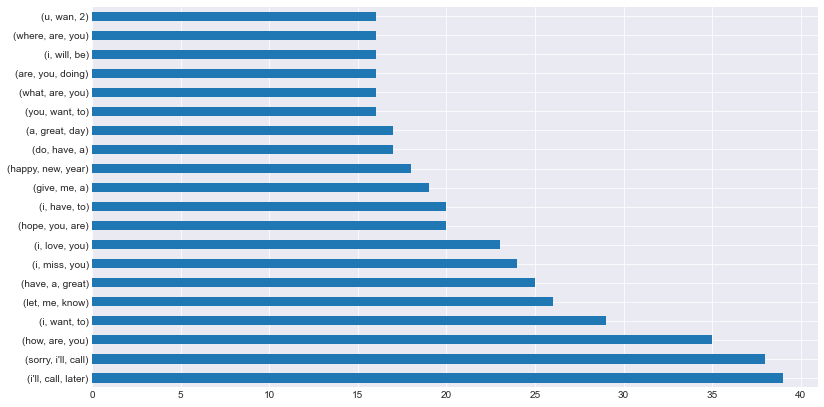

In [59]:
pd.Series(tri_ham).value_counts().head(20).plot.barh()

(-0.5, 799.5, 599.5, -0.5)

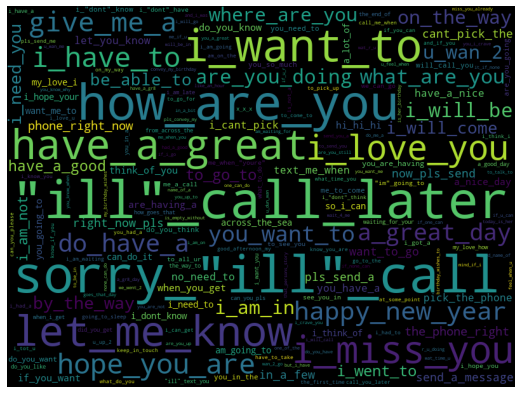

In [56]:
img = WordCloud(background_color='black', width=800, height=600).generate_from_frequencies(tri_ham_cloud.value_counts())
plt.imshow(img)
plt.axis('off')

<AxesSubplot:>

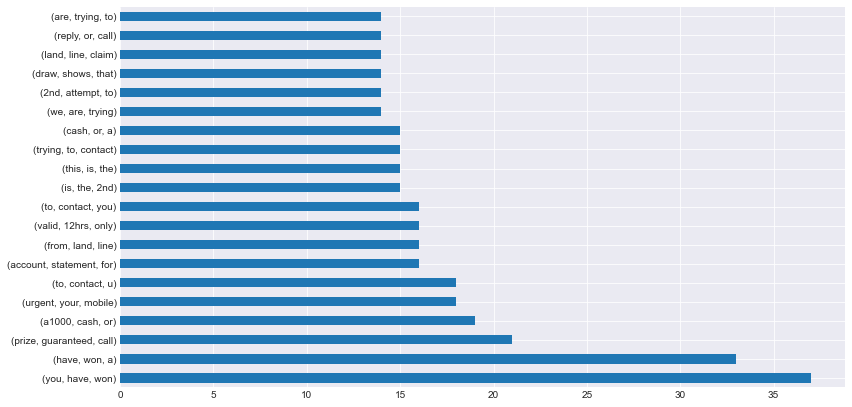

In [60]:
pd.Series(tri_spam).value_counts().head(20).plot.barh()

(-0.5, 799.5, 599.5, -0.5)

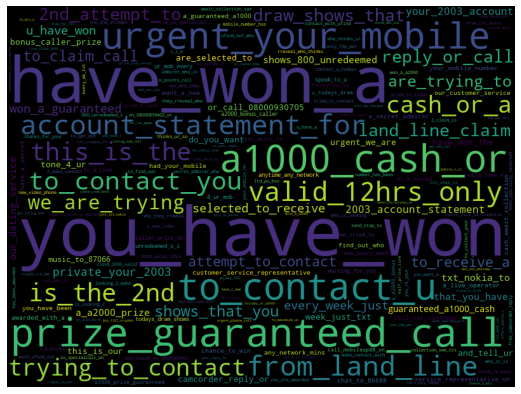

In [57]:
img = WordCloud(background_color='black', width=800, height=600).generate_from_frequencies(tri_spam_cloud.value_counts())
plt.imshow(img)
plt.axis('off')


---

#### Blog Articles

In [61]:
blog_1 = acquire.get_blog_posts('https://codeup.com/workshops/from-bootcamp-to-bootcamp-a-military-appreciation-panel/')
blog_2 = acquire.get_blog_posts('https://codeup.com/featured/our-acquisition-of-the-rackspace-cloud-academy-one-year-later/')
blog_3 = acquire.get_blog_posts('https://codeup.com/workshops/virtual/learn-to-code-html-css-on-4-30/')
blog_4 = acquire.get_blog_posts('https://codeup.com/workshops/virtual/learn-to-code-python-workshop-on-4-16/')
blog_5 = acquire.get_blog_posts('https://codeup.com/codeup-news/coming-soon-cloud-administration/')
codeup_df = pd.DataFrame([blog_1, blog_2, blog_3, blog_4, blog_5])
codeup_df


,title,content
0,From Bootcamp to Bootcamp | A Military Appreci...,"In honor of Military Appreciation Month, join ..."
1,Our Acquisition of the Rackspace Cloud Academy...,"Just about a year ago on April 16th, 2021 we a..."
2,Learn to Code: HTML & CSS on 4/30,HTML & CSS are the design building blocks of a...
3,Learn to Code: Python Workshop on 4/23,"According to LinkedIn, the “#1 Most Promising ..."
4,Coming Soon: Cloud Administration,We’re launching a new program out of San Anton...


In [71]:
blogs = prepare.basic_clean(' '.join(codeup_df.content))
blogs = re.sub(r'[\s]',' ', blogs)
#blogs = tokenize(blogs)

In [72]:
blogs

'in honor of military appreciation month join us for a discussion with codeup alumni who are also military veterans we will chat about their experiences attending a coding bootcamp and how their military training set them up for success here at codeup grab your virtual seat now so you can be sent the exclusive livestream link on the 11th  thank you to our panelists for participating   christopher aguirre taryn mckenzie  desiree mcelroy    and thanks to codeups trey iapachino who is also an air force veteran just about a year ago on april 16th 2021 we announced our acquisition of the rackspace cloud academy for a short time after the acquisition it was rebranded as the codeup cloud academy and is now a fulltime part of the codeup brand you can read our blog when we announced this last year by clicking here  to look back at the past year we checked in with marcus benavidez and mike jaime who stayed with codeup after previously working with the rackspace cloud academy we also checked in w

In [78]:
bi_blogs = list(nltk.bigrams(blogs.split()))
blogs_cloud = pd.Series(bi_blogs).astype('string').apply(lambda x: re.sub("[()',']", '',x).replace(' ','_'))
tri_blogs = list(nltk.ngrams(blogs.split(), 3))
tri_blogs_cloud = pd.Series(tri_blogs).astype('string').apply(lambda x: re.sub("[()',']", '',x).replace(' ','_'))

<AxesSubplot:>

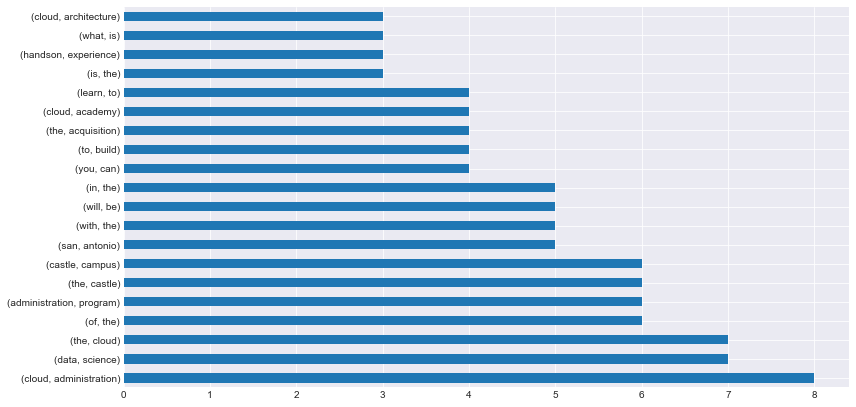

In [76]:
pd.Series(bi_blogs).value_counts().head(20).plot.barh()

(-0.5, 799.5, 599.5, -0.5)

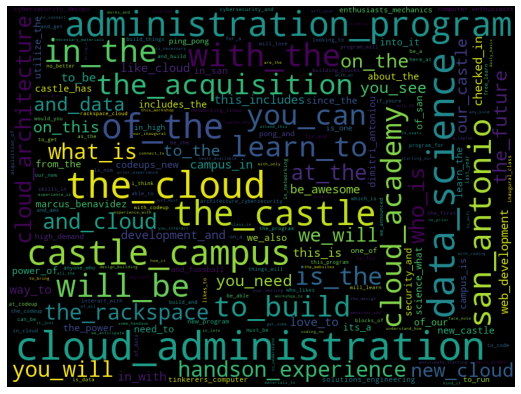

In [77]:
img = WordCloud(background_color='black', width=800, height=600).generate_from_frequencies(blogs_cloud.value_counts())
plt.imshow(img)
plt.axis('off')

<AxesSubplot:>

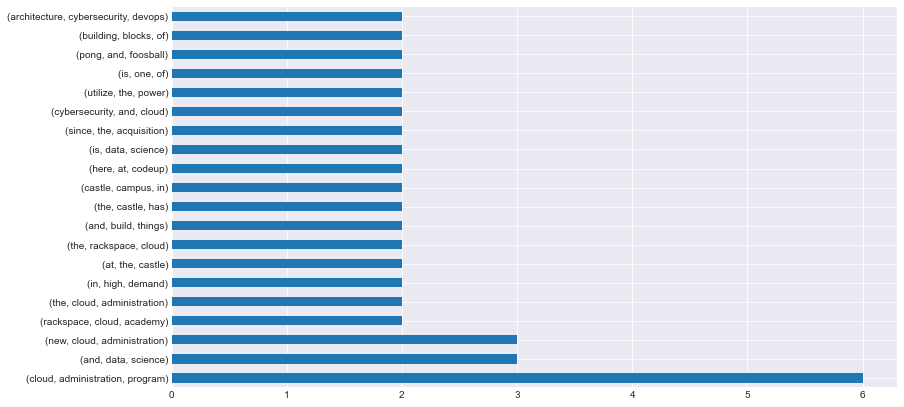

In [79]:
pd.Series(tri_blogs).value_counts().head(20).plot.barh()

(-0.5, 799.5, 599.5, -0.5)

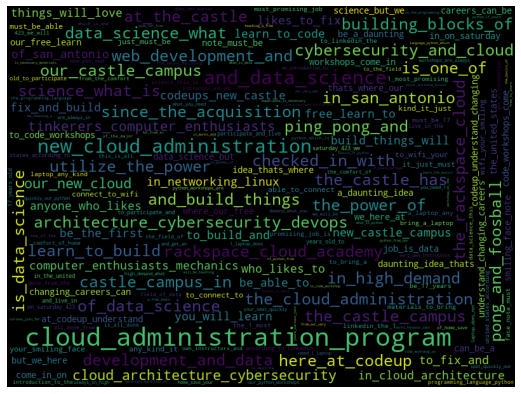

In [80]:
img = WordCloud(background_color='black', width=800, height=600).generate_from_frequencies(tri_blogs_cloud.value_counts())
plt.imshow(img)
plt.axis('off')

---

#### News Articles

In [81]:
business_articles = acquire.get_news_articles('https://inshorts.com/en/read/business', 'business')
sports_articles = acquire.get_news_articles('https://inshorts.com/en/read/sports', 'sports')
tech_articles = acquire.get_news_articles('https://inshorts.com/en/read/technology', 'technology')
entertainment_articles = acquire.get_news_articles('https://inshorts.com/en/read/entertainment', 'entertainment')
news_df = pd.concat([business_articles, sports_articles, tech_articles, entertainment_articles], axis=0).reset_index(drop=True)
news_df

,title,content,category
0,"Bitcoin briefly drops below $30,000 for first ...","Bitcoin, in the early hours of Tuesday, fell b...",business
1,SBI hikes interest rates on bulk term deposits...,SBI has increased interest rates on its bulk t...,business
2,Twitter will comply with EU content rules afte...,Tesla CEO Elon Musk has said that Twitter will...,business
3,Microsoft to help cover US employees' travel c...,Microsoft has said that it will cover travel c...,business
4,"After Musk's Taj Mahal tweet, his mother says ...",After Elon Musk tweeted he visited Taj Mahal i...,business
...,...,...,...
95,Never dreamt I'd come this far: Dhanush on 20 ...,After completing 20 years in the film industry...,entertainment
96,"Actor-model Jethro Lazenby, son of Australian ...",Australian actor-model Jethro Lazenby has pass...,entertainment
97,Prez Kovind condoles demise of Santoor maestro...,President Ram Nath Kovind on Tuesday condoled ...,entertainment
98,I also whistled watching Yash's intro scene in...,Actor Sanjay Dutt revealed he also whistled du...,entertainment
